In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pydecomp

In [2]:
l = np.arange(-25,25,0.5)

x, y, z = np.meshgrid(l, l, l, indexing='ij')

grid = np.stack([x,y,z])

r = np.sqrt(np.square(x[:]) + np.square(y[:]))
theta = np.arctan2(y[:],x[:])

V_theta = 1/r

V_x = V_theta * np.sin(theta)
V_y = -V_theta * np.cos(theta)
V_z = V_x[:] * 0

C = np.nan_to_num(np.array([V_x,
                  V_y,
                  V_z]),nan=0.0, posinf=0.0, neginf=0.0)

c:\Users\hmk21\Anaconda3\envs\Gorgon-Tools\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\Users\hmk21\Anaconda3\envs\Gorgon-Tools\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


z:\home\myfuncs\pydecomp\pydecomp.py:101: RuntimeWarning: divide by zero encountered in true_divide
  greens = 1 / ( 4 * np.pi * h * np.sqrt( x**2 + y**2 + z**2) )


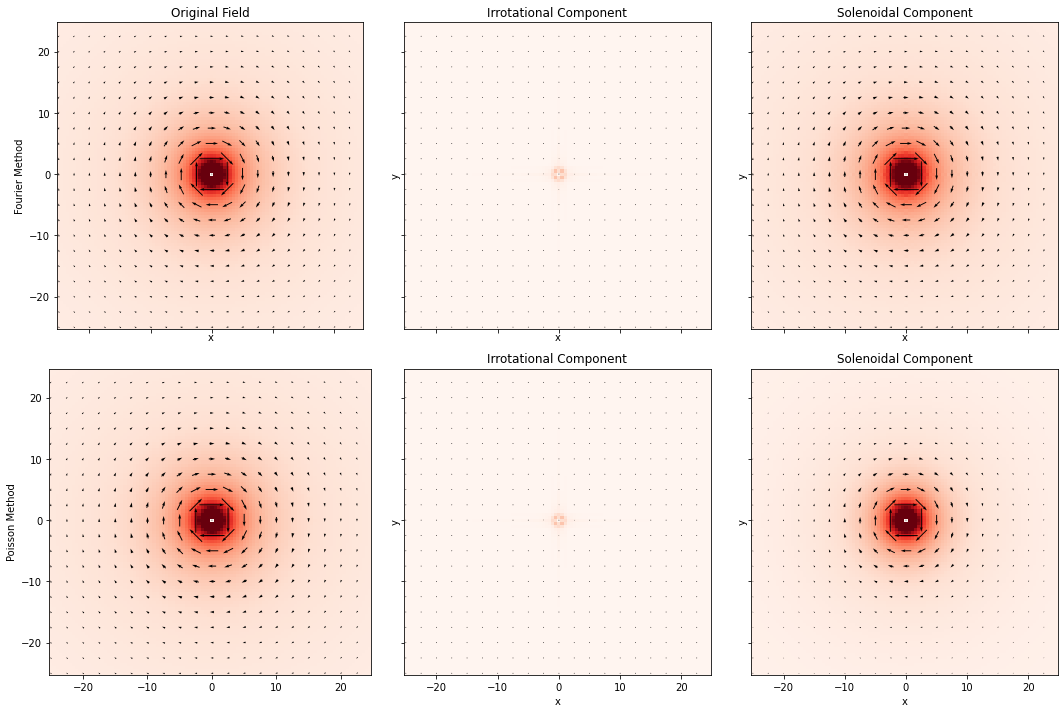

In [3]:
vmin = 0
vmax = 0.5
zslice=10
scale = 0.1

x,y,z = grid

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = C[0,:,:,:] # X-component of arrow direction
Vquiv = C[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,10))
for i in range(2):
    img = ax[i,0].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(C,axis=0)[:,:,zslice] ,cmap = 'Reds', vmin = vmin, vmax = vmax)
    ax[i,0].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
ax[0,0].set(xlabel='x', title=r"Original Field", aspect=1)
ax[0,0].set(ylabel='Fourier Method')
V_irr, V_rot = pydecomp.Helmholtz_Decomp_Fourier(C)

" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = V_irr[0,:,:,:] # X-component of arrow direction
Vquiv = V_irr[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[0,1].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_irr,axis=0)[:,:,zslice] ,cmap = 'Reds', vmin = vmin, vmax = vmax)
ax[0,1].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale =scale)
ax[0,1].set(ylabel='y', xlabel='x', title=r"Irrotational Component", aspect=1)


" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = (V_rot)[0,:,:,:] # X-component of arrow direction
Vquiv = (V_rot)[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[0,2].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_rot,axis=0)[:,:,zslice] ,cmap = 'Reds', vmin = vmin, vmax = vmax)
ax[0,2].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle', scale =scale)
ax[0,2].set(ylabel='y', xlabel='x', title=r"Solenoidal Component", aspect=1)

" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = V_irr[0,:,:,:] # X-component of arrow direction
Vquiv = V_irr[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[1,1].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_irr,axis=0)[:,:,zslice] ,cmap = 'Reds', vmin = vmin, vmax = vmax)
ax[1,1].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale =scale)
ax[1,1].set(ylabel='y', xlabel='x', title=r"Irrotational Component", aspect=1)
ax[1,0].set(ylabel='Poisson Method')
V_irr, V_rot = pydecomp.Helmholtz_Decomp_Poisson(C, 0.5)

" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = (V_rot)[0,:,:,:] # X-component of arrow direction
Vquiv = (V_rot)[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[1,2].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_rot,axis=0)[:,:,zslice] ,cmap = 'Reds', vmin = vmin, vmax = vmax)
ax[1,2].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle', scale =scale)
ax[1,2].set(ylabel='y', xlabel='x', title=r"Solenoidal Component", aspect=1)

fig.tight_layout()
plt.show()

In [5]:
q = np.arange(-25,25,0.5)
x, y, z = np.meshgrid(q, q, q, indexing='ij')
grid = np.stack([x,y,z])

"Random field"
Cx = x+y
Cy = y-x
Cz = z*0
C = np.asarray([Cx,Cy,Cz])

z:\home\myfuncs\pydecomp\pydecomp.py:101: RuntimeWarning: divide by zero encountered in true_divide
  greens = 1 / ( 4 * np.pi * h * np.sqrt( x**2 + y**2 + z**2) )


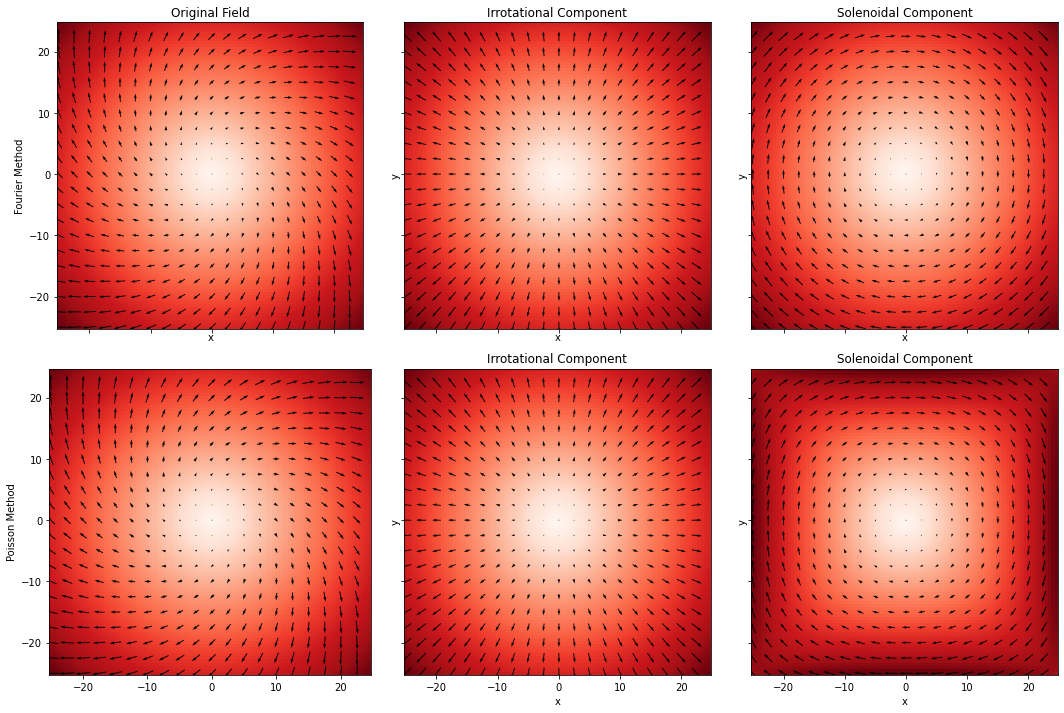

In [7]:
vmin = 0
vmax = 0.5
zslice=10
scale = 0.1

x,y,z = grid

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = C[0,:,:,:] # X-component of arrow direction
Vquiv = C[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,10))
for i in range(2):
    img = ax[i,0].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(C,axis=0)[:,:,zslice] ,cmap = 'Reds')#, vmin = vmin, vmax = vmax)
    ax[i,0].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle')#, scale =scale)
ax[0,0].set(xlabel='x', title=r"Original Field", aspect=1)
ax[0,0].set(ylabel='Fourier Method')
V_irr, V_rot = pydecomp.Helmholtz_Decomp_Fourier(C)

" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = V_irr[0,:,:,:] # X-component of arrow direction
Vquiv = V_irr[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[0,1].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_irr,axis=0)[:,:,zslice] ,cmap = 'Reds')#, vmin = vmin, vmax = vmax)
ax[0,1].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle')#, scale =scale)
ax[0,1].set(ylabel='y', xlabel='x', title=r"Irrotational Component", aspect=1)


" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = (V_rot)[0,:,:,:] # X-component of arrow direction
Vquiv = (V_rot)[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[0,2].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_rot,axis=0)[:,:,zslice] ,cmap = 'Reds')#, vmin = vmin, vmax = vmax)
ax[0,2].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle')#, scale =scale)
ax[0,2].set(ylabel='y', xlabel='x', title=r"Solenoidal Component", aspect=1)

" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = V_irr[0,:,:,:] # X-component of arrow direction
Vquiv = V_irr[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[1,1].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_irr,axis=0)[:,:,zslice] ,cmap = 'Reds')#, vmin = vmin, vmax = vmax)
ax[1,1].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle')#, scale =scale)
ax[1,1].set(ylabel='y', xlabel='x', title=r"Irrotational Component", aspect=1)
ax[1,0].set(ylabel='Poisson Method')
V_irr, V_rot = pydecomp.Helmholtz_Decomp_Poisson(C, 0.5)

" Make a quiver plot "
# xstep = 3
# ystep = 3
Xquiv = x[:]
Yquiv = y[:]
Uquiv = (V_rot)[0,:,:,:] # X-component of arrow direction
Vquiv = (V_rot)[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

img = ax[1,2].pcolormesh(x[:,:,zslice],y[:,:,zslice], np.linalg.norm(V_rot,axis=0)[:,:,zslice] ,cmap = 'Reds')#, vmin = vmin, vmax = vmax)
ax[1,2].quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle')#, scale =scale)
ax[1,2].set(ylabel='y', xlabel='x', title=r"Solenoidal Component", aspect=1)

fig.tight_layout()
plt.show()